# **TODO:**

- Alter the `NNmodel` classes to accept differnt model structures other than hidden layers
    - add functionality for Sigmoid, remove Enable/Disable dropout, etc. 
    - adjust output to handle cases other than binary classification

- Add more theoretical math models to explain the relationship

- Update training methods to reward/punish complexity 
    - currently there are different methods for each, patch them into one

# C.A.S.T.L.E.

#### Component Assembly Structure Tracking for Learning Emergence

Castle is an assembly tracking neural network, which partitions weight tensors into `molecular blocks` and assigns `atomic codes` based on block statistics. The resulting `molecular lattice` encodes the network's structural motifs, enabling calculation of an assembly index that quantifies **modularity and reuse**. During training, the `loss function` incorporates a `complexity reward` or penalty derived from the assembly index, and gradients are modulated according to molecular reuse. If the assembly index exceeds a threshold, the architecture is evolved to favor more efficient or interpretable structures. This approach bridges neural network optimization with principles from assembly theory, promoting modularity, interpretability, and adaptive architectural evolution.

***

## Mathematical Framework for Atomic Molecules, Lattices, and Assembly Tracking in CASTLE

## 1. Atomic Molecule Definition and Construction

### 1.1 Weight Tensor Partitioning

Given a weight tensor $W \in \mathbb{R}^{m \times n}$ from a neural network layer, we partition it into non-overlapping molecular blocks:

$$W = \bigcup_{i=1}^{M} \bigcup_{j=1}^{N} W_{i,j}^{(k \times k)}$$

where:
- $M = \lfloor m/k \rfloor$: number of molecular blocks along rows
- $N = \lfloor n/k \rfloor$: number of molecular blocks along columns  
- $k$: molecular block size (typically $k = 2$)
- $W_{i,j}^{(k \times k)}$: molecular block at lattice position $(i,j)$

### 1.2 Atomic Weight Calculation

For each molecular block $W_{i,j}^{(k \times k)}$, we compute its atomic weight:

$$\omega_{i,j} = \frac{1}{k^2} \sum_{a=1}^{k} \sum_{b=1}^{k} W_{i,j}[a,b]$$

where $\omega_{i,j}$ represents the average weight magnitude of the molecular block.

### 1.3 Atomic Symbol Assignment

The atomic symbol $\sigma_{i,j}$ is assigned based on weight magnitude ranges:

$$\sigma_{i,j} = \begin{cases}
\text{Ze}^{\pm} & \text{if } 0.0 \leq |\omega_{i,j}| < 0.01 \\
\text{Sm}^{\pm} & \text{if } 0.01 \leq |\omega_{i,j}| < 0.1 \\
\text{Md}^{\pm} & \text{if } 0.1 \leq |\omega_{i,j}| < 0.5 \\
\text{Lg}^{\pm} & \text{if } 0.5 \leq |\omega_{i,j}| < 1.0 \\
\text{Xl}^{\pm} & \text{if } 1.0 \leq |\omega_{i,j}| < 2.0 \\
\text{Xx}^{\pm} & \text{if } |\omega_{i,j}| \geq 2.0
\end{cases}$$

where the superscript $\pm$ indicates the sign of $\omega_{i,j}$.

### 1.4 Molecular Equivalence Relation

Two molecules $\mathcal{M}_1$ and $\mathcal{M}_2$ are considered equivalent if:

$$\mathcal{M}_1 \equiv \mathcal{M}_2 \iff \begin{cases}
\sigma_1 = \sigma_2 & \text{(same atomic symbol)} \\
|\omega_1 - \omega_2| < \epsilon & \text{(similar atomic weights)}
\end{cases}$$

where $\epsilon$ is the weight precision threshold (typically $\epsilon = 0.001$).

## 2. Molecular Lattice Structure

### 2.1 Lattice Definition

A molecular lattice $\mathcal{L}$ is defined as:

$$\mathcal{L} = \{(\mathcal{M}_{i,j}, \mathbf{p}_{i,j}) : 1 \leq i \leq M, 1 \leq j \leq N\}$$

where:
- $\mathcal{M}_{i,j}$: molecular block at lattice position $(i,j)$
- $\mathbf{p}_{i,j} = (i,j)$: spatial position in the lattice
- $M \times N$: lattice dimensions

### 2.2 Lattice Identification

Each lattice is assigned a unique identifier:

$$\text{ID}(\mathcal{L}) = \text{MD5}\left(\bigcup_{i=1}^{M} \bigcup_{j=1}^{N} \text{str}(\mathcal{M}_{i,j})\right)[:8]$$

This ensures that lattices with identical molecular compositions receive the same ID.

### 2.3 Molecular Formula Representation

The molecular formula of a lattice is:

$$\mathcal{F}(\mathcal{L}) = \prod_{\sigma \in \Sigma} \sigma^{n_{\sigma}}$$

where:
- $\Sigma$: set of all atomic symbols in the lattice
- $n_{\sigma}$: count of molecules with atomic symbol $\sigma$

For example: $\mathcal{F}(\mathcal{L}) = \text{Ze}^3\text{Sm}^2\text{Md}^1$ indicates 3 zero-like, 2 small, and 1 medium molecule.

### 2.4 Lattice Similarity Metric

The similarity between two lattices $\mathcal{L}_1$ and $\mathcal{L}_2$ is:

$$\text{sim}(\mathcal{L}_1, \mathcal{L}_2) = \frac{|\mathcal{M}_1 \cap \mathcal{M}_2|}{|\mathcal{M}_1 \cup \mathcal{M}_2|}$$

where $\mathcal{M}_1$ and $\mathcal{M}_2$ are the sets of unique molecules in each lattice.

## 3. Assembly Theory Framework

### 3.1 Assembly Pathway Definition

An assembly pathway $\mathcal{P}(\mathcal{L})$ for lattice $\mathcal{L}$ is a sequence of assembly steps:

$$\mathcal{P}(\mathcal{L}) = \{s_1, s_2, \ldots, s_k\}$$

where each step $s_i$ is either:
- $\text{reuse\_lattice}(\mathcal{L}_j)$: reuse molecules from existing lattice $\mathcal{L}_j$
- $\text{atomic\_molecule}(\sigma)$: create new molecule with atomic symbol $\sigma$

### 3.2 Assembly Index Calculation

The assembly index quantifies the complexity of constructing a lattice:

$$A(\mathcal{L}) = \begin{cases}
|\mathcal{U}(\mathcal{L})| & \text{if no reusable components} \\
\sum_{i=1}^{k} c(s_i) & \text{if assembly pathway exists}
\end{cases}$$

where:
- $\mathcal{U}(\mathcal{L})$: set of unique molecules in lattice $\mathcal{L}$
- $c(s_i)$: cost of assembly step $s_i$ (typically $c(s_i) = 1$)

### 3.3 System Assembly Complexity

The system-wide assembly complexity at epoch $t$ is:

$$A_{\text{sys}}^{(t)} = \frac{1}{u_s} \sum_{s \in \mathcal{S}} e^{a_s} \cdot \frac{n_s - 1}{|\mathcal{S}|}$$

where:
- $\mathcal{S}$: set of all molecular lattices at epoch $t$
- $u_s$: number of unique atomic symbols
- $n_s$: frequency of atomic symbol $s$
- $a_s$: assembly complexity of molecules with symbol $s$
- $|\mathcal{S}|$: total number of molecular blocks

### 3.4 Molecular Reuse Tracking

The reuse factor for molecule $\mathcal{M}$ is:

$$\mathcal{R}(\mathcal{M}) = |\{\mathcal{L} \in \mathcal{L}_{\text{all}} : \mathcal{M} \in \mathcal{L}\}|$$

where $\mathcal{L}_{\text{all}}$ is the set of all lattices discovered during training.

### 3.5 Assembly Pathway Optimization

The optimal assembly pathway minimizes the total assembly cost:

$$\mathcal{P}^*(\mathcal{L}) = \arg\min_{\mathcal{P}} \sum_{s_i \in \mathcal{P}} c(s_i)$$

subject to the constraint that $\mathcal{P}$ can successfully construct $\mathcal{L}$.

## 4. Temporal Evolution and Tracking

### 4.1 Lattice Evolution Mapping

The evolution of a layer's lattice structure is tracked as:

$$\mathcal{L}_{\text{layer}}^{(t)} \to \mathcal{L}_{\text{layer}}^{(t+1)}$$

where the transition probability is:

$$P(\mathcal{L}_{\text{layer}}^{(t+1)} | \mathcal{L}_{\text{layer}}^{(t)}) = \exp\left(-\frac{d(\mathcal{L}_{\text{layer}}^{(t)}, \mathcal{L}_{\text{layer}}^{(t+1)})}{\tau}\right)$$

with $d(\cdot, \cdot)$ being the lattice distance metric and $\tau$ the temperature parameter.

### 4.2 Molecular Discovery Rate

The rate of new molecular discovery is:

$$\frac{d|\mathcal{M}_{\text{library}}|}{dt} = \alpha \cdot (1 - \frac{|\mathcal{M}_{\text{library}}|}{|\mathcal{M}_{\text{max}}|})$$

where $\alpha$ is the discovery rate parameter and $|\mathcal{M}_{\text{max}}|$ is the theoretical maximum number of unique molecules.

### 4.3 Assembly Complexity Evolution

The evolution of system assembly complexity follows:

$$\frac{dA_{\text{sys}}}{dt} = \beta \cdot (A_{\text{target}} - A_{\text{sys}}) - \gamma \cdot \mathcal{R}_{\text{avg}}$$

where:
- $A_{\text{target}}$: target assembly complexity
- $\mathcal{R}_{\text{avg}}$: average molecular reuse factor
- $\beta, \gamma$: evolution rate parameters

## 5. Gradient Modification Framework

### 5.1 Assembly-Aware Gradient Scaling

The gradient for molecular block $W_{i,j}^{(k \times k)}$ is modified as:

$$\nabla W_{i,j}^{(k \times k)} \leftarrow \nabla W_{i,j}^{(k \times k)} \cdot \mathcal{G}(\mathcal{M}_{i,j}, A(\mathcal{L}))$$

where the gradient modifier is:

$$\mathcal{G}(\mathcal{M}_{i,j}, A(\mathcal{L})) = \begin{cases}
0.8 & \text{if } \mathcal{R}(\mathcal{M}_{i,j}) > 1 \text{ (highly reused)} \\
1.2 & \text{if } \sigma_{i,j} = \text{Ze}^{\pm} \text{ (zero-like)} \\
0.9 & \text{if } A(\mathcal{L}) > \theta_{\text{complex}} \\
1.0 & \text{otherwise}
\end{cases}$$

### 5.2 Complexity-Regularized Loss Function

The total loss incorporates assembly complexity:

$$\mathcal{L}_{\text{total}} = \mathcal{L}_{\text{base}} + \lambda \cdot \mathcal{R}_{\text{complexity}}(A_{\text{sys}})$$

where the complexity regularizer is:

$$\mathcal{R}_{\text{complexity}}(A_{\text{sys}}) = \begin{cases}
-\alpha \cdot A_{\text{sys}} & \text{if } A_{\text{sys}} < A_{\text{optimal}} \\
\beta \cdot (A_{\text{sys}} - A_{\text{optimal}})^2 & \text{if } A_{\text{sys}} > A_{\text{optimal}}
\end{cases}$$

## 6. Architectural Evolution Criteria

### 6.1 Complexity-Based Architecture Suggestions

Architecture modifications are suggested when:

$$A_{\text{layer}} > \theta_{\text{split}} \Rightarrow \text{Suggest layer splitting}$$
$$A_{\text{layer}} < \theta_{\text{merge}} \Rightarrow \text{Suggest layer merging}$$

where $\theta_{\text{split}}$ and $\theta_{\text{merge}}$ are complexity thresholds.

### 6.2 Reuse-Based Architecture Optimization

The architecture optimization objective is:

$$\mathcal{O}_{\text{arch}} = \arg\min_{\text{arch}} \left[\mathcal{L}_{\text{accuracy}} + \lambda_1 \cdot A_{\text{sys}} - \lambda_2 \cdot \mathcal{R}_{\text{total}}\right]$$

where $\mathcal{R}_{\text{total}}$ is the total molecular reuse across all layers.

## 7. Experimental Validation Framework

### 7.1 Complexity-Accuracy Relationship

The relationship between assembly complexity and accuracy is modeled as:

$$\mathcal{A}(A_{\text{sys}}) = \mathcal{A}_{\text{base}} + \gamma \cdot \left(1 - e^{-\beta \cdot A_{\text{sys}}}\right)$$

or alternatively:

$$\mathcal{A}(A_{\text{sys}}) = \mathcal{A}_{\text{max}} \cdot \exp\left(-\frac{(A_{\text{sys}} - \mu_{\text{opt}})^2}{2\sigma^2}\right) + \mathcal{A}_{\text{min}}$$

### 7.2 Statistical Validation Metrics

The quality of the complexity-accuracy relationship is measured by:

- **Coefficient of Determination**: $R^2 = 1 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}}$
- **Root Mean Square Error**: $\text{RMSE} = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(\mathcal{A}_i - \hat{\mathcal{A}}_i)^2}$
- **Optimal Complexity**: $A_{\text{sys}}^* = \arg\max_{A_{\text{sys}}} \mathcal{A}(A_{\text{sys}})$

This mathematical framework provides a rigorous foundation for understanding how atomic molecules are constructed, organized into lattices, and tracked through assembly theory principles in the CASTLE framework. The relationships capture both the static structural properties and the dynamic evolution of molecular patterns during neural network training.

***

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_breast_cancer, load_iris, load_wine

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# self-made imports
from core.trainer import train_with_molecular_parameter_updates, train_basic, train_reward_complexity
from core.NNmodel import MolecularNeuralNet
from core.analyzer import validate_complexity_accuracy_relationship, analyze_complexity_accuracy_relationship
from visualize.lattice_builder import plot_pyvis_3d_lattice_interactive

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")
torch.manual_seed(42)
np.random.seed(42)

In [2]:
# Data Parameters
test_size = 0.2         # Proportion of the dataset to include in the test split (default for all functions is 0.2))
random_state = 42

# Data Loading Functions
def load_breast_cancer_data(test_size=0.2, random_state=42):
    # Load the breast cancer dataset
    data = load_breast_cancer()
    X, y = data.data, data.target
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

def load_iris_data(test_size=0.2, random_state=42):
    # Load the iris dataset
    data = load_iris()
    X, y = data.data, data.target
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

def load_wine_data(test_size=0.2, random_state=42):
    # Load the wine dataset
    data = load_wine()
    X, y = data.data, data.target
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

def load_mnsit_data():
    # Load the MNIST dataset
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    x_train = x_train.astype('float32') / 255.
    x_test = x_test.astype('float32') / 255.
    x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
    x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
    return x_train, x_test, y_train, y_test

# Output
try:
    X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = load_breast_cancer_data(test_size, random_state)
    X_train_iris, X_test_iris, y_train_iris, y_test_iris = load_iris_data(test_size, random_state)
    X_train_wine, X_test_wine, y_train_wine, y_test_wine = load_wine_data(test_size, random_state)
    X_train_mnist, X_test_mnist, y_train_mnist, y_test_mnist = load_mnsit_data()
    print("Data loaded successfully.")
except Exception as e:
    print(f"An error occurred while loading the data: {e}")

# Print pd dataframe of dataset's shape, classes, and number of features
pd.DataFrame({
    "Dataset": ["Breast Cancer", "Iris", "Wine", "MNIST"],
    "Shape of Training Data": [X_train_cancer.shape, X_train_iris.shape, X_train_wine.shape, X_train_mnist.shape],
    "Number of Classes": [len(np.unique(y_train_cancer)), len(np.unique(y_train_iris)), len(np.unique(y_train_wine)), len(np.unique(y_train_mnist))],
    "Number of Features": [X_train_cancer.shape[1], X_train_iris.shape[1], X_train_wine.shape[1], X_train_mnist.shape[1]],
    "Classes": [np.unique(y_train_cancer), np.unique(y_train_iris), np.unique(y_train_wine), np.unique(y_train_mnist)]
}).set_index("Dataset").T.applymap(lambda x: x if isinstance(x, str) else str(x)).style.set_properties(**{'text-align': 'left'}).set_table_attributes('style="width: 100%; border-collapse: collapse;"').set_caption("Dataset Information").format(na_rep='N/A')   


Data loaded successfully.


Dataset,Breast Cancer,Iris,Wine,MNIST
Shape of Training Data,"(455, 30)","(120, 4)","(142, 13)","(60000, 784)"
Number of Classes,2,3,3,2
Number of Features,30,4,13,784
Classes,[0 1],[0 1 2],[0 1 2],[0. 1.]


***

## Testing and Validation

Let $\mathcal{A}(t)$ denote the model accuracy at time $t$, and $A_{\text{sys}}^{(t)}$ represent the system assembly complexity. The relationship between accuracy and complexity can be modeled as:

$$\mathcal{A}(t) = \mathcal{A}_{\text{base}} + \gamma \cdot \left(1 - e^{-\beta \cdot A_{\text{sys}}^{(t)}}\right)$$

where:
- $\mathcal{A}_{\text{base}}$: base accuracy achievable with minimal complexity,
- $\gamma$: maximum potential accuracy improvement from complexity,
- $\beta$: rate parameter controlling how quickly complexity benefits manifest.

This formulation captures three key properties:
1. As $A_{\text{sys}}^{(t)} \to 0$, $\mathcal{A}(t) \to \mathcal{A}_{\text{base}}$,
2. As $A_{\text{sys}}^{(t)} \to \infty$, $\mathcal{A}(t) \to \mathcal{A}_{\text{base}} + \gamma$,
3. The marginal benefit of additional complexity diminishes as complexity increases, reflecting the principle of diminishing returns.

#### Alternative Formulation for Small Complexity Ranges

For practical application with small ranges of complexity, a linear approximation may be suitable:

$$\mathcal{A}(t) \approx \mathcal{A}_{\text{min}} + \delta \cdot A_{\text{sys}}^{(t)}$$

where:
- $\mathcal{A}_{\text{min}}$: minimum accuracy with zero complexity,
- $\delta$: linear rate of accuracy improvement with complexity.

See `core.analyzer` for code running analysis.
>```python
>def exponential_model(complexity, A_base, gamma, beta):
>    """
>    Exponential model for accuracy-complexity relationship:
>    A(t) = A_base + γ * (1 - exp(-β * A_sys(t)))
>    """
>    return A_base + gamma * (1 - np.exp(-beta * complexity))
>
>def linear_model(complexity, A_min, delta):
>    """
>    Linear model for accuracy-complexity relationship:
>    A(t) ≈ A_min + δ * A_sys(t)
>    """
>    return A_min + delta * complexity
>```

In [ ]:
# Example Usage of Training Functions
bc_model = MolecularNeuralNet(
    input_size=X_train_cancer.shape[1],
    hidden_sizes=[16, 8, 4],
    output_size=1,
    dropout=0.2
)

bc_model, bc_tracker, bc_losses, bc_accuracies, bc_complexities = train_with_molecular_parameter_updates(
    model=bc_model,
    X_train=X_train_cancer,
    y_train=y_train_cancer,
    X_test=X_test_cancer,
    y_test=y_test_cancer,
    epochs=50,
    lr=0.001,
    track_every=5,
    molecule_size=2,
    complexity_reward_weight=0.05,  # Weight for complexity reward
    max_beneficial_complexity=12    # Cap for beneficial complexity
)

Starting complexity-managed training...
Epoch 0: 4 lattices, 32 unique molecules discovered
Epoch 0: Loss=1.1626, Accuracy=0.6228, Complexity: 8.25
Epoch 5: 4 lattices, 32 unique molecules discovered
Epoch 10: 4 lattices, 33 unique molecules discovered
Epoch 15: 4 lattices, 34 unique molecules discovered
Epoch 20: 4 lattices, 34 unique molecules discovered
Epoch 20: Loss=0.7284, Accuracy=0.3860, Complexity: 0.75
Epoch 25: 4 lattices, 35 unique molecules discovered
Epoch 30: 4 lattices, 36 unique molecules discovered
Epoch 35: 4 lattices, 36 unique molecules discovered
Epoch 40: 4 lattices, 36 unique molecules discovered
Epoch 40: Loss=0.6893, Accuracy=0.3772, Complexity: 1.00
Epoch 45: 4 lattices, 36 unique molecules discovered


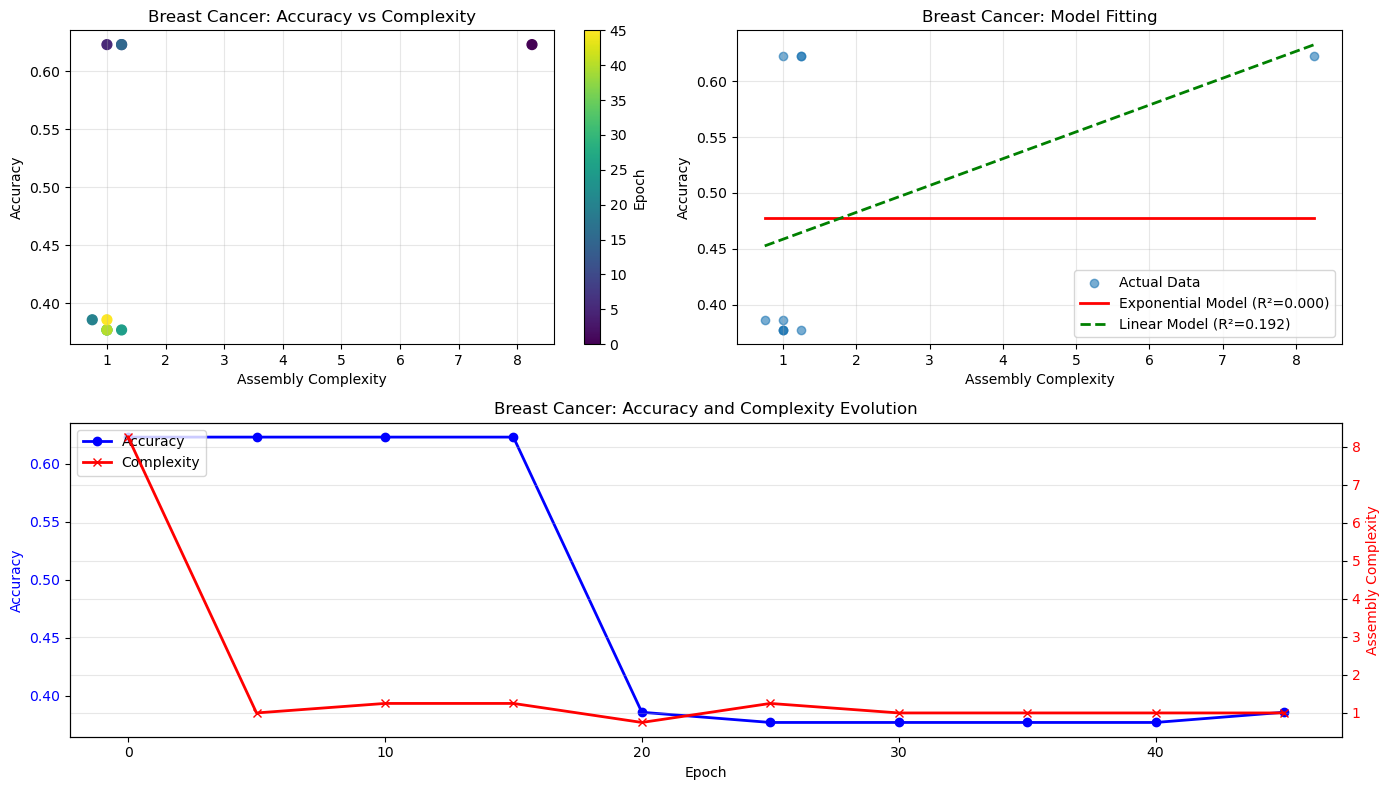


=== Breast Cancer Complexity-Accuracy Relationship ===
Exponential Model: A(t) = 0.2386 + 0.2386 * (1 - exp(-50.0000 * A_sys(t)))
  R² = 0.0000, RMSE = 0.1189
Linear Model: A(t) = 0.4345 + 0.0241 * A_sys(t)
  R² = 0.1916, RMSE = 0.1069
Best fitting model: Linear


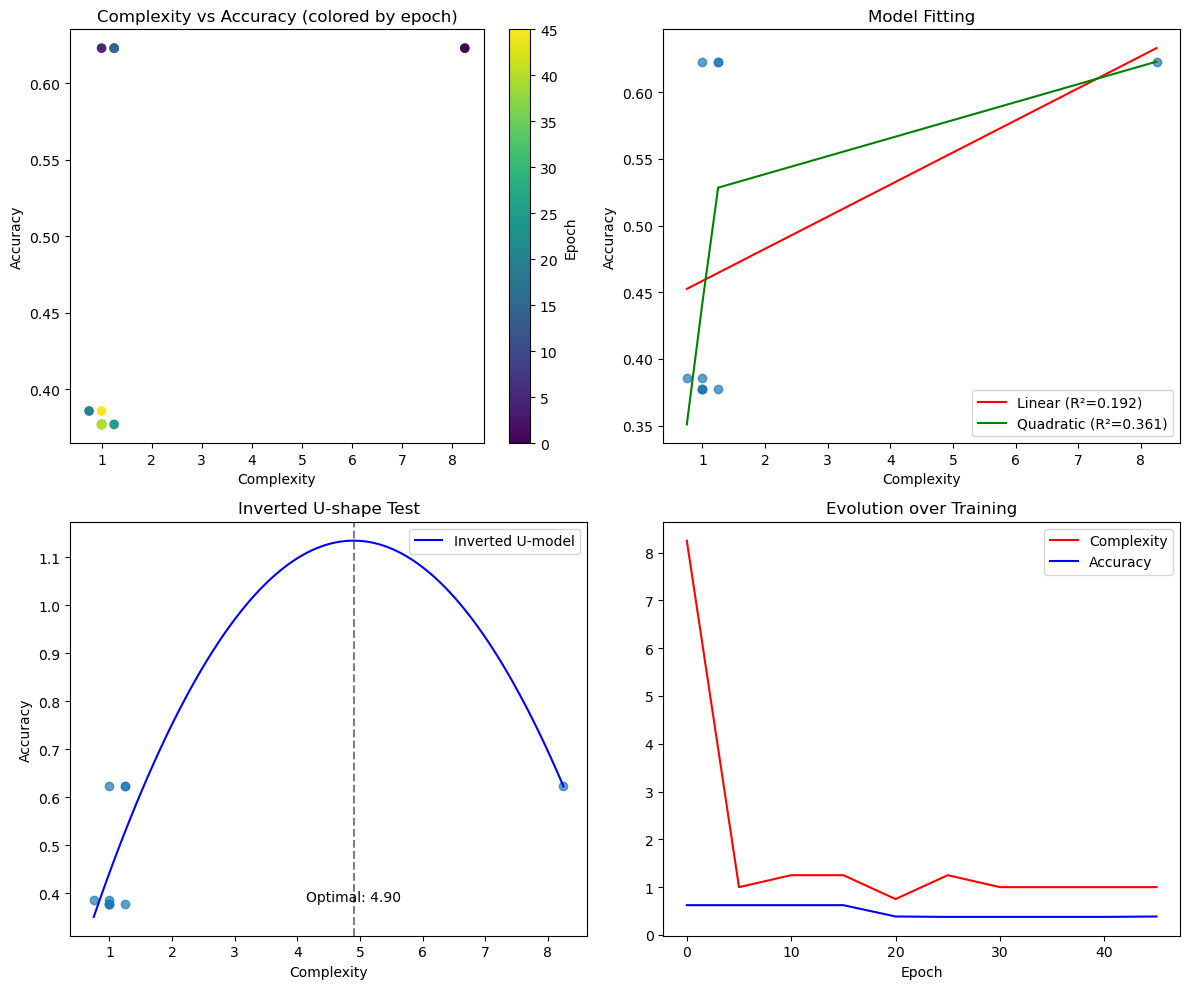


=== Breast Cancer Complexity-Accuracy Analysis ===
Linear model: accuracy = 0.4345 + 0.0241 * complexity
Linear R²: 0.1916
Quadratic model better explains the relationship (R²=0.3608)
Estimated optimal complexity: 4.90


,complexity,accuracy,epoch
0,8.25,0.622807,0
1,1.00,0.622807,5
2,1.25,0.622807,10
3,1.25,0.622807,15
4,0.75,0.385965,20
5,1.25,0.377193,25
6,1.00,0.377193,30
7,1.00,0.377193,35
8,1.00,0.377193,40
9,1.00,0.385965,45


In [4]:
# Example Usage of Analyzer Functions
bc_complexity_accuracy_df = validate_complexity_accuracy_relationship(
    tracker=bc_tracker,
    accuracies=bc_accuracies,
    dataset_name="Breast Cancer"
)

analyze_complexity_accuracy_relationship(
    accuracies=bc_accuracies, 
    complexities=bc_complexities, 
    dataset_name="Breast Cancer"
)

Starting complexity-managed training...
Epoch 0: 4 lattices, 28 unique molecules discovered
Epoch 0: Loss=0.6932, Accuracy=0.6404, Complexity: 7.50
Epoch 5: 4 lattices, 29 unique molecules discovered
Epoch 10: 4 lattices, 31 unique molecules discovered
Epoch 15: 4 lattices, 31 unique molecules discovered
Epoch 20: 4 lattices, 31 unique molecules discovered
Epoch 20: Loss=0.6864, Accuracy=0.6228, Complexity: 0.75
Epoch 25: 4 lattices, 31 unique molecules discovered
Epoch 30: 4 lattices, 32 unique molecules discovered
Epoch 35: 4 lattices, 32 unique molecules discovered
Epoch 40: 4 lattices, 33 unique molecules discovered
Epoch 40: Loss=0.6657, Accuracy=0.7105, Complexity: 1.50
Epoch 45: 4 lattices, 33 unique molecules discovered


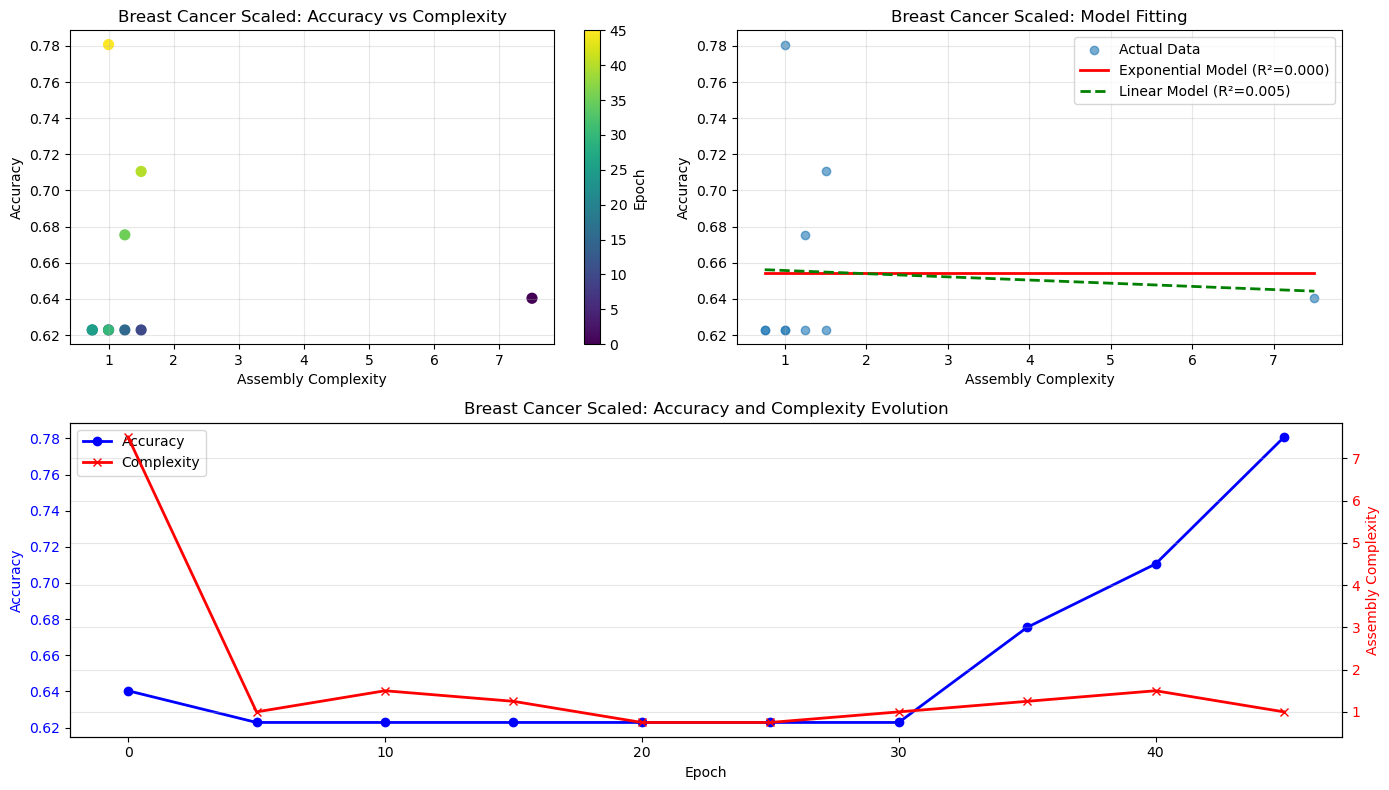


=== Breast Cancer Scaled Complexity-Accuracy Relationship ===
Exponential Model: A(t) = 0.3272 + 0.3272 * (1 - exp(-50.0000 * A_sys(t)))
  R² = 0.0000, RMSE = 0.0507
Linear Model: A(t) = 0.6575 + -0.0018 * A_sys(t)
  R² = 0.0045, RMSE = 0.0506
Best fitting model: Linear


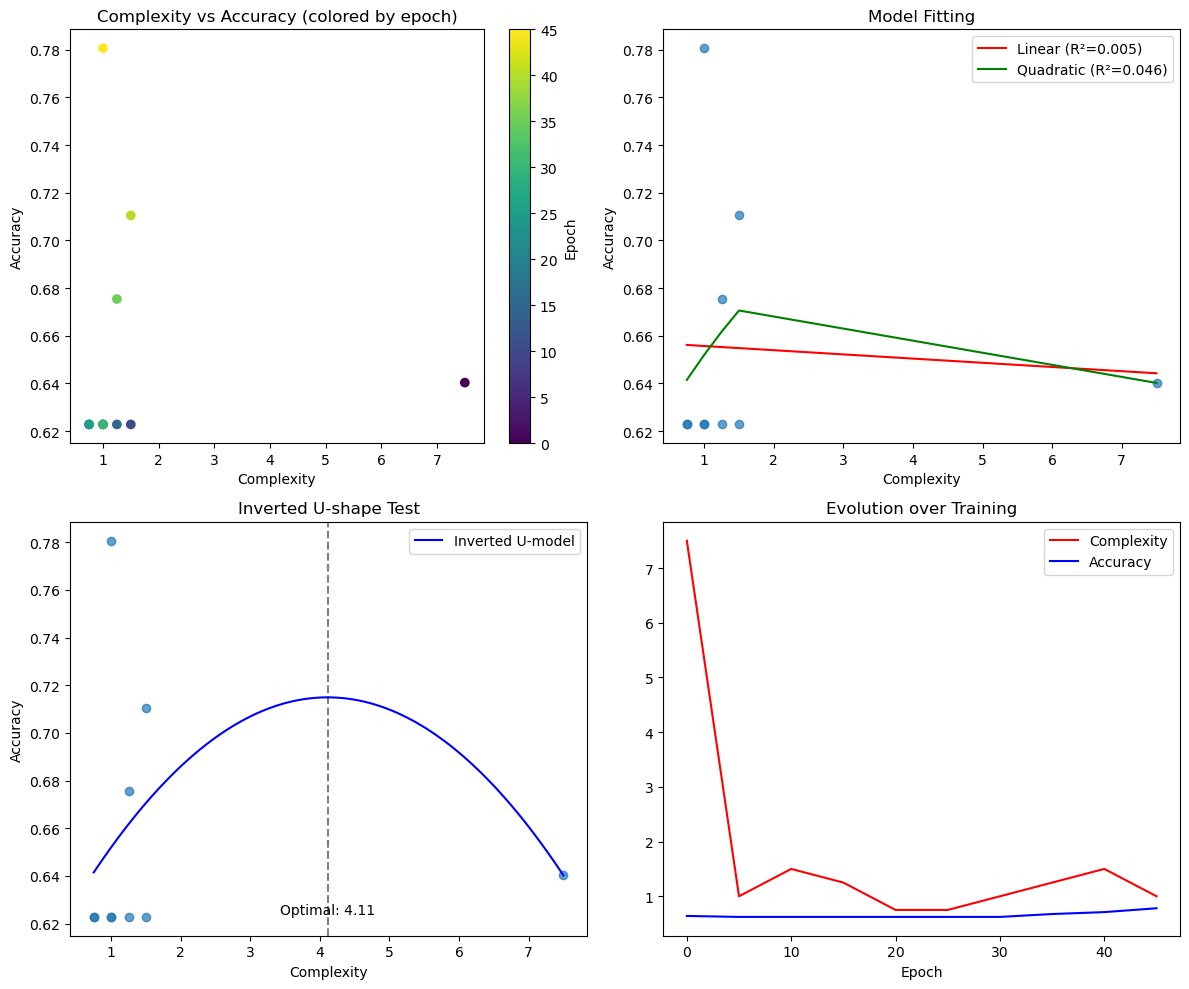


=== Breast Cancer Scaled Complexity-Accuracy Analysis ===
Linear model: accuracy = 0.6575 + -0.0018 * complexity
Linear R²: 0.0045
Quadratic model better explains the relationship (R²=0.0461)
Estimated optimal complexity: 4.11


,complexity,accuracy,epoch
0,7.50,0.640351,0
1,1.00,0.622807,5
2,1.50,0.622807,10
3,1.25,0.622807,15
4,0.75,0.622807,20
5,0.75,0.622807,25
6,1.00,0.622807,30
7,1.25,0.675439,35
8,1.50,0.710526,40
9,1.00,0.780702,45


In [5]:
# Example with Scaled data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_cancer)
X_test_scaled = scaler.transform(X_test_cancer)

bc_model_scaled = MolecularNeuralNet(
    input_size=X_train_scaled.shape[1],
    hidden_sizes=[16, 8, 4],
    output_size=1,
    dropout=0.2
)

bc_model_scaled, bc_tracker_scaled, bc_losses_scaled, bc_accuracies_scaled, bc_complexities_scaled = train_with_molecular_parameter_updates(
    model=bc_model_scaled,
    X_train=X_train_scaled,
    y_train=y_train_cancer,
    X_test=X_test_scaled,
    y_test=y_test_cancer,
    epochs=50,
    lr=0.001,
    track_every=5,
    molecule_size=2,
    complexity_reward_weight=0.05,  # Weight for complexity reward
    max_beneficial_complexity=12    # Cap for beneficial complexity
)

# Report 
bc_complexity_accuracy_df_scaled = validate_complexity_accuracy_relationship(
    tracker=bc_tracker_scaled,
    accuracies=bc_accuracies_scaled,
    dataset_name="Breast Cancer Scaled"
)

analyze_complexity_accuracy_relationship(
    accuracies=bc_accuracies_scaled, 
    complexities=bc_complexities_scaled, 
    dataset_name="Breast Cancer Scaled"
)